In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df['Country/Region'].nunique()

187

In [4]:
df['WHO Region'].nunique()

6

In [5]:
df.groupby('WHO Region').describe()

Confirmed                                                \
                          count           mean            std    min      25%   
WHO Region                                                                      
Africa                     48.0   15066.812500   65087.434387   10.0   910.00   
Americas                   35.0  252551.028571  817100.096342   17.0   265.00   
Eastern Mediterranean      22.0   67761.090909   93399.654809  674.0  3367.50   
Europe                     56.0   58920.053571  127226.689411   12.0  2157.50   
South-East Asia            10.0  183529.700000  461327.177069   24.0   963.75   
Western Pacific            16.0   18276.750000   29427.554873   20.0   204.75   

                                                    Deaths               ...  \
                           50%       75%        max  count         mean  ...   
WHO Region                                                               ...   
Africa                  2129.5   7088.50   452529.0   48.0   254.645833  ...   
Americas                7340.0  76171.00  4290259.0   35.0  9792.342857  ...   
Eastern Mediterranean  28575.0  88626.00   293606.0   22.0  1742.681818  ...   
Europe                 12191.0  51077.50   816680.0   56.0  3770.428571  ...   
South-East Asia         3333.0  79915.25  1480073.0   10.0  4134.900000  ...   
Western Pacific         1009.5  19262.75    86783.0   16.0   515.562500  ...   

                      1 week change           1 week % increase             \
                                75%       max             count       mean   
WHO Region                                                                   
Africa                       771.00   78901.0              48.0  18.086458   
Americas                    8603.00  455582.0              35.0  16.331143   
Eastern Mediterranean       4482.00   17892.0              22.0  10.482273   
Europe                      2639.00   40468.0              56.0   7.769643   
South-East Asia             9293.75  324735.0              10.0   8.513000   
Western Pacific             1571.50   13142.0              16.0  22.111250   

                                                                         
                             std   min     25%     50%      75%     max  
WHO Region                                                               
Africa                 29.029858  0.00  4.6250  10.555  21.4550  191.07  
Americas               20.535095  0.00  4.4100  12.970  19.4500  119.54  
Eastern Mediterranean  11.860347 -3.84  3.1775   5.755  17.3325   42.78  
Europe                  7.904270  0.00  2.2325   4.335  10.4200   32.22  
South-East Asia         8.365745  0.00  2.6675   7.070  11.7550   28.11  
Western Pacific        55.382071  0.00  1.0600   4.030  19.5900  226.32  

[6 rows x 104 columns]

In [6]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

<AxesSubplot:>

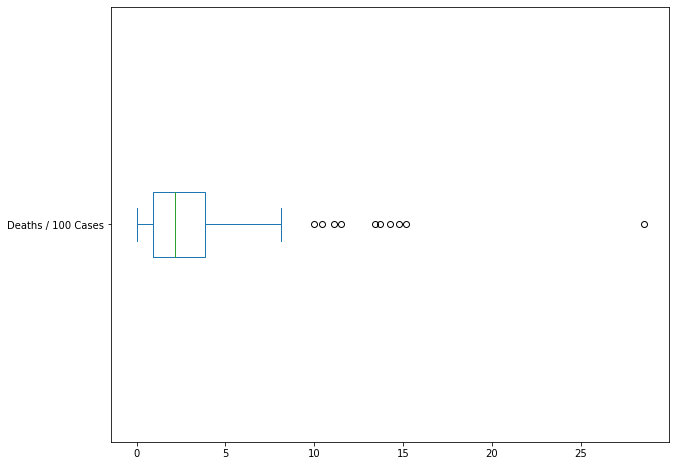

In [7]:
plt.figure(figsize = (10,8))
df['Deaths / 100 Cases'].plot.box(vert = False)

In [8]:
df.loc[df['Deaths / 100 Cases'] > 8, 'Deaths / 100 Cases'] = df['Deaths / 100 Cases'].mean()

<AxesSubplot:>

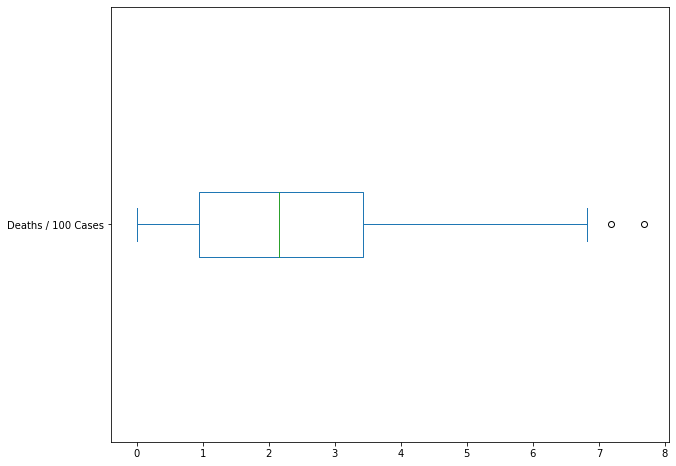

In [9]:
plt.figure(figsize = (10,8))
df['Deaths / 100 Cases'].plot.box(vert = False)

In [10]:
df2 = df[['Confirmed', 'Active', 'Deaths', 'Recovered']]

<AxesSubplot:>

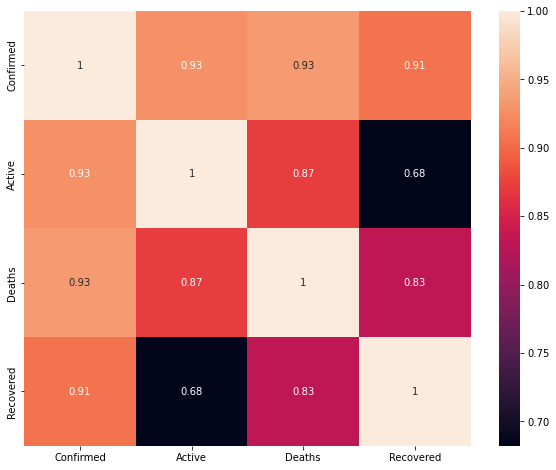

In [11]:
plt.figure(figsize = (10, 8))
sns.heatmap(df2.corr(), annot = True)

Text(0, 0.5, 'Deaths red, Recovered green')

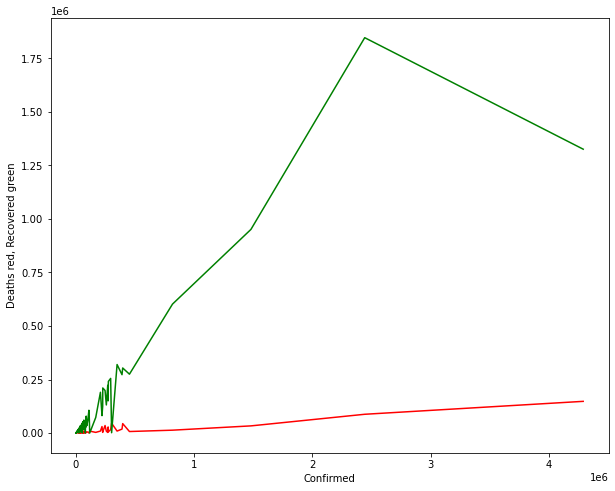

In [12]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df2, x = 'Confirmed', y = 'Deaths', color = 'r')
sns.lineplot(data = df2, x = 'Confirmed', y = 'Recovered', color = 'g')
plt.ylabel('Deaths red, Recovered green')

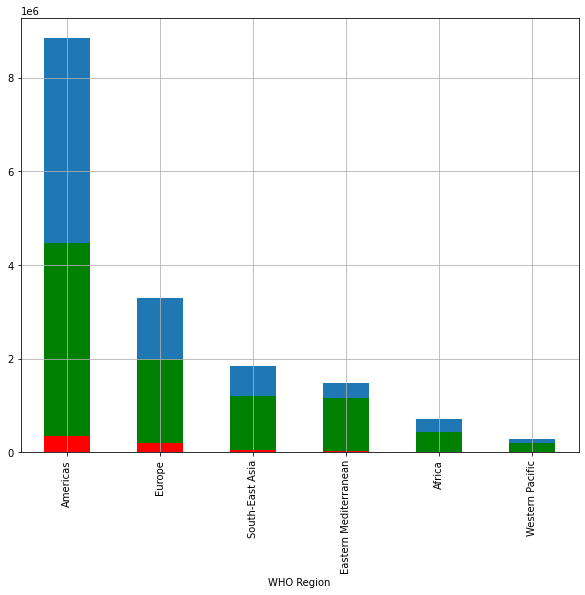

In [13]:
plt.figure(figsize = (10, 8))
df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending = False).plot.bar()
df.groupby('WHO Region')['Recovered'].sum().sort_values(ascending = False).plot.bar(color = 'g')
df.groupby('WHO Region')['Deaths'].sum().sort_values(ascending = False).plot.bar(color = 'r')
plt.grid()

In [14]:
le = LabelEncoder()

In [15]:
le.fit(df['WHO Region'].unique())

LabelEncoder()

In [16]:
df['WRle'] = le.transform(df['WHO Region'])

In [17]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,WRle
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,2
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,3
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,3
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0


In [18]:
x = df.iloc[:, [1,3,4,-1]].values
y = df.iloc[:, 2].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(x_test)

In [25]:
#that's probably overfitting?
r2 = r2_score(y_test, y_pred)
r2

1.0